In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

In [33]:
def GD_WT(f, grad_f, x0, kmax, tolf, tolx, alpha):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [34]:
def GD(f, grad_f, x0, kmax, tolf, tolx):
    xsol=x0
    x=[x0]
    f_val=[f(xsol)]
    grad=[grad_f(xsol)]
    err=[np.linalg.norm(grad_f(xsol))]
    i=0
    cond = True
    while i < kmax and cond :
        alpha = backtracking(f, grad_f, xsol)
        xsol=(xsol-alpha*grad_f(xsol))
        x.append(xsol)
        f_val.append(f(xsol))
        grad.append(grad_f(xsol))
        err.append(np.linalg.norm(grad_f(xsol)))
        i+=1
        cond =  np.linalg.norm(grad_f(xsol)) > tolf*np.linalg.norm(grad_f(x0)) and np.linalg.norm(x[i]-x[i-1]) > tolx
    return x,i,f_val,grad,err

In [35]:
n = 5
def f(x):
    l = p()
    v = np.linspace(0,1,n)
    A = np.vander(v, increasing = True)
    x_true = np.ones(5)
    b = A @ x_true
    return (np.linalg.norm(A @ x - b,2)**2)/2 + (l*(np.linalg.norm(x,2)**2))/2
def grad_f(x):
    l = p()
    v = np.linspace(0,1,n)
    A = np.vander(v, increasing = True)
    b = A @ np.ones(5)
    return A @ x - b + l*x

In [36]:
x0 = np.zeros(n)
l = np.linspace(0,1,30)
er = []
for c in l:
    p = lambda :c
    x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f,x0,10000, 1e-4, 1e-4)
    er.append(err_comp[-1])

### Plot of error for different values of "l"

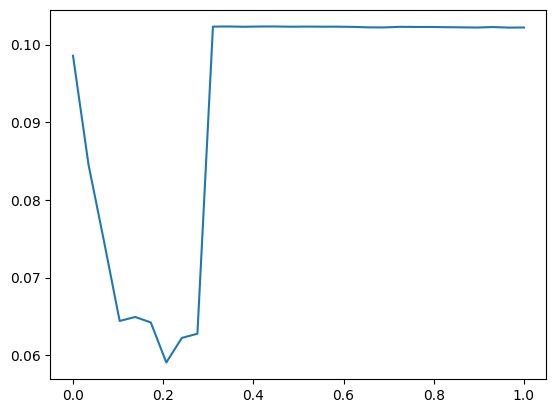

In [37]:
plt.plot(l,er)
plt.show()

In [38]:
p = lambda : 0.2 
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f,x0,10000, 1e-4, 1e-4)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [0.82181244 0.95264955 1.0630979  1.08416645 0.91300391]
K= 13
f(x)= 0.5497431581560566
grad_f(x)= [-0.01382507  0.00542363  0.03161483  0.04660708  0.01733105]
Error= 0.06076702370552653


### GD with backtracking method

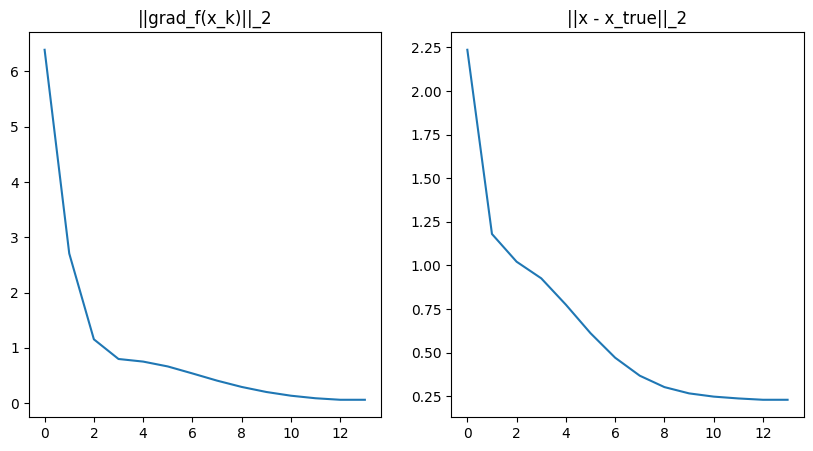

In [39]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD without backtracking method with alpha = 0.001

In [40]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-3)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [0.58251895 0.72978894 0.92893087 1.17594879 1.45447656]
K= 1000
f(x)= 0.9691858978297652
grad_f(x)= [-0.30097726 -0.33899334 -0.3341693  -0.20689835  0.16255943]
Error= 0.6216151635452491


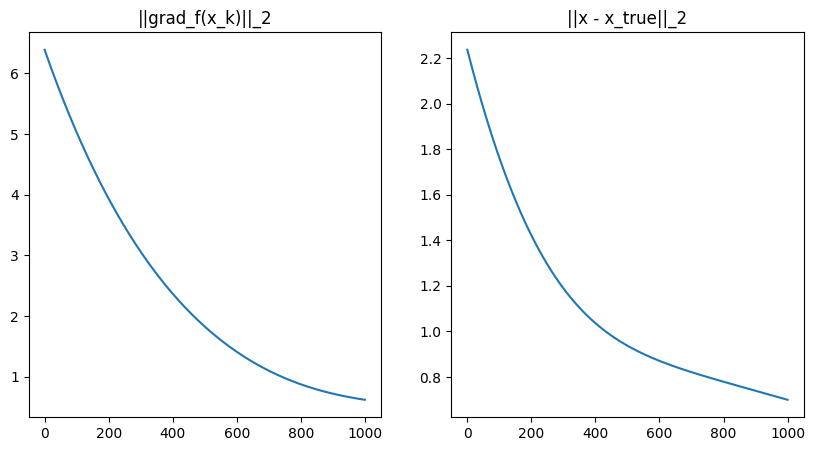

In [41]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD without backtracking method with alpha = 0.01

In [42]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD_WT(f,grad_f, x0, 1000, 1e-5, 1e-5, 1e-2)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])

x= [0.83332857 0.92609197 0.99976627 1.03346745 1.00429596]
K= 1000
f(x)= 0.5555958737187663
grad_f(x)= [-5.71405725e-06  5.95059496e-04  7.21306590e-04 -6.20860068e-05
 -2.19059039e-03]
Error= 0.002382635641416869


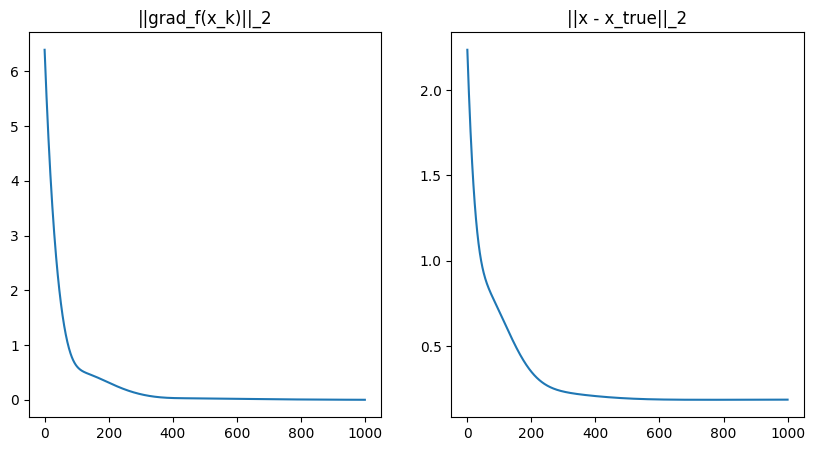

In [43]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()

### GD with backtracking method with kmax = 100

In [44]:
x_comp, i_comp,f_val_comp, grad_comp, err_comp = GD(f,grad_f, x0, 100, 1e-4, 1e-4)
print("x=",x_comp[-1])
print("K=",i_comp)
print("f(x)=",f_val_comp[-1])
print("grad_f(x)=",grad_comp[-1])
print("Error=",err_comp[-1])


x= [0.82181244 0.95264955 1.0630979  1.08416645 0.91300391]
K= 13
f(x)= 0.5497431581560566
grad_f(x)= [-0.01382507  0.00542363  0.03161483  0.04660708  0.01733105]
Error= 0.06076702370552653


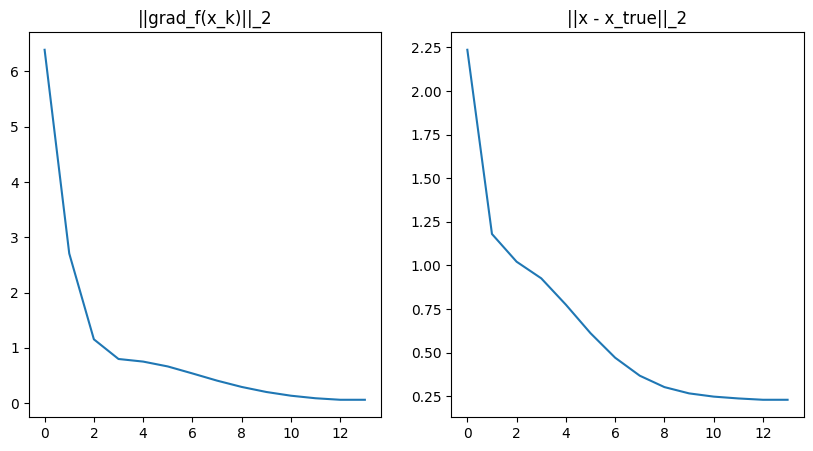

In [45]:
x_true = np.ones(n)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("||grad_f(x_k)||_2")
plt.plot(np.arange(0,i_comp+1), err_comp)
plt.subplot(1,2,2)
plt.title("||x - x_true||_2")
plt.plot(np.arange(0,i_comp+1), [np.linalg.norm(s-x_true,2) for s in x_comp])
plt.show()